# Pattern Recognition and Machine Learning

## Programming Assignment 1
### Author: Saurav Kumar (SC16B108)

1. (a) Generate a data set of N = 1,000 that stem from two equiprobable classes modeled by normal distributions with means, $m_1 = 0$, $m_2 = 3$ and variances (A) $\sigma_1 = \sigma_2 = 2$ (B) $\sigma_1 = 2, \sigma_2 = 4$ <br>
(b) Plot the likelihood for each class.
<br>
(c) Plot the posterior for each class.
<br>
(d) Plot the posterior for each class when the prior probabilities are $P = [0.7, 0.3]^T$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


In [3]:
sns.set(color_codes=True)

In [78]:
N = 1000
mean1 = 0
mean2 = 3
sigma1 = 2
sigma2 = 2

In [79]:
#A = [0,1]
Class = [0,1]

In [80]:
#X0 = []
#X1 = []
features_class_0 = []
features_class_1 = []
for iteration in range(N):
    chosen_class = np.random.choice(Class) #equiprobab
    if(chosen_class==0):
        features_class_0.append(np.random.normal(mean1,sigma1))
    else:
        features_class_1.append(np.random.normal(mean2,sigma2))        

In [81]:
dataset_0 = np.zeros((len(features_class_0),2))
dataset_1 = np.ones((len(features_class_1),2))
dataset_0[:, 0] = features_class_0
dataset_1[:, 0] = features_class_1

In [82]:
df_0 = pd.DataFrame(dataset_0,columns = ('Feature', 'Class'))
df_1 = pd.DataFrame(dataset_1,columns = ('Feature', 'Class'))
df = df_0.append(df_1,ignore_index=True) #dataframe generated
dataset = df.sample(frac=1).reset_index(drop=True) #shuffling
#dataset generated

In [84]:
prob_x_class_0 = norm(mean1,sigma1).pdf(dataset.values[:,0])
prob_x_class_1 = norm(mean2,sigma2).pdf(dataset.values[:,0])

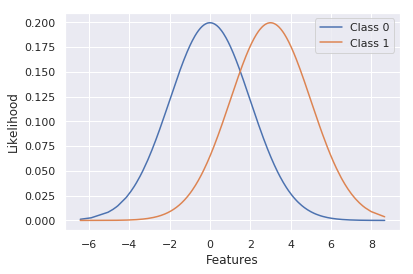

In [89]:
order = np.argsort(dataset.values[:,0])
sorted_features = np.array(dataset.values[:,0])[order]
likelihood_class_0 = np.array(prob_x_class_0)[order]
plt.plot(sorted_features_class_0,likelihood_class_0) # likelihood of 1st class
plt.xlabel('Features')
plt.ylabel('Likelihood')
likelihood_class_1 = np.array(prob_x_class_1)[order]
plt.plot(sorted_features_class_1,likelihood_class_1) # likelihood of 2nd class
plt.legend(['Class 0','Class 1'])

In [90]:
def Posterior(prior_prob):
    #Posterior_Probab = likelihood*Prior_prob/(sigma(likelihood)*prior + likelihood*prior)
    #%%
    #normalization factor, Z or P(X)
    P_x = prob_x_class_0*prior_prob[0] + prob_x_class_1*prior_prob[1] 
    
    Q_0 = prob_x_class_0*prior_prob[0]/P_x
    Q_1 = prob_x_class_1*prior_prob[1]/P_x
    
    #order = np.argsort(dataset_0[:,0])
    #xs3 = np.array(dataset_0[:,0])[order]
    posterior_0 = np.array(Q_0)[order_0]
    plt.plot(sorted_features_class_0, posterior_0) # posterior of Class 0
    plt.xlabel('Features')
    plt.ylabel('Posterior')
    #order = np.argsort(data1[:,0])
    #xs4 = np.array(data1[:,0])[order]
    posterior_1 = np.array(Q_1)[order_1]
    plt.plot(sorted_features_class_1, posterior_1) # posterior of Class 1
    plt.legend(['Class 0', 'Class 1'])

In [91]:
Prior_prob = [0.5, 0.5]

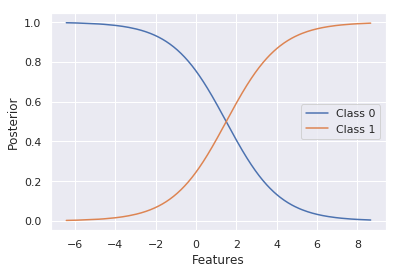

In [92]:
Posterior(Prior_prob)

In [93]:
Prior_prob = [0.7, 0.3]

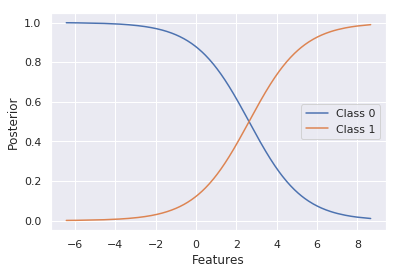

In [94]:
Posterior(Prior_prob)

2. (a) Generate and plot a data set of N = 1,000 two-dimensional vectors that stem from three equiprobable classes modeled by normal distributions with mean vectors, $m_1 = [1, 1]^T$ , $m_2 = [7, 7]^T$ , $m_3 = [15, 1]^T$ and covariance matrices,

$
S_1 = \begin{bmatrix}
    12 & 0 \\
    0 & 1 \\
\end{bmatrix}$
$
S_2 = \begin{bmatrix}
    8 & 3 \\
    3 & 2 \\
\end{bmatrix}$
$
S_3 = \begin{bmatrix}
    2 & 0 \\
    0 & 2 \\
\end{bmatrix}$
<br>
(b) Plot the 2D likelihood for each class.
<br>
(c) Plot the posterior for each class.<br>
(d) Plot the posterior for each class when the prior probabilities are $P = [0.6, 0.3,0.1]^T$

In [117]:
N = 1000
mean1 = [1,1]
mean2 = [7,7]
mean3 = [15,1]
cov1 = [[12,0],[0,1]]
cov2 = [[8,3],[3,2]]
cov3 = [[2,0],[0,2]]
prior_prob = [1/3, 1/3, 1/3]

In [118]:
Class = [0,1,2]

In [119]:
features_class_0 = [[],[]]
features_class_1 = [[],[]]
features_class_2 = [[],[]]

In [120]:
for iteration in range(N):
    chosen_class = np.random.choice(Class) # equiprobab
    if chosen_class==0:
        #X0.append(np.random.normal(mu1,sigma1))
        x0, y0 = np.random.multivariate_normal(mean1, cov1)
        features_class_0[0].append(x0)
        features_class_0[1].append(y0)
    elif chosen_class==1:
        #X1.append(np.random.normal(mu2,sigma2))
        x1, y1 = np.random.multivariate_normal(mean2, cov2)
        features_class_1[0].append(x1)
        features_class_1[1].append(y1)
    else:
        #X2.append(np.random.normal(mu3,sigma3))
        x2, y2 = np.random.multivariate_normal(mean3, cov3)
        features_class_2[0].append(x2)
        features_class_2[1].append(y2)

In [121]:
features_class_0 = np.transpose(np.asarray(features_class_0))
features_class_1 = np.transpose(np.asarray(features_class_1))
features_class_2 = np.transpose(np.asarray(features_class_2))

In [125]:
dataset_0 = np.zeros((len(features_class_0),3))
dataset_1 = np.ones((len(features_class_1),3))
dataset_2 = 2 * np.ones((len(features_class_2),3))
dataset_0[:,[0,1]] = features_class_0
dataset_1[:,[0,1]] = features_class_1
dataset_2[:,[0,1]] = features_class_2

In [126]:
df0 = pd.DataFrame(dataset_0,columns = ('X1','X2','Class'))
df1 = pd.DataFrame(dataset_1,columns = ('X1','X2','Class'))
df2 = pd.DataFrame(dataset_2,columns = ('X1','X2','Class'))
df = df0.append([df1,df2],ignore_index=True)
dataset = df.sample(frac=1).reset_index(drop=True)

In [131]:
#likelihood is calculated by putting the value of x in multivariate normal funcn
prob_x_class_0 = multivariate_normal.pdf(dataset.values[:,[0,1]],mean = mean1, cov = cov1)
prob_x_class_1 = multivariate_normal.pdf(dataset.values[:,[0,1]],mean = mean2, cov = cov2)
prob_x_class_2 = multivariate_normal.pdf(dataset.values[:,[0,1]],mean = mean3, cov = cov3)

Text(0.5,0,'Feature 2')

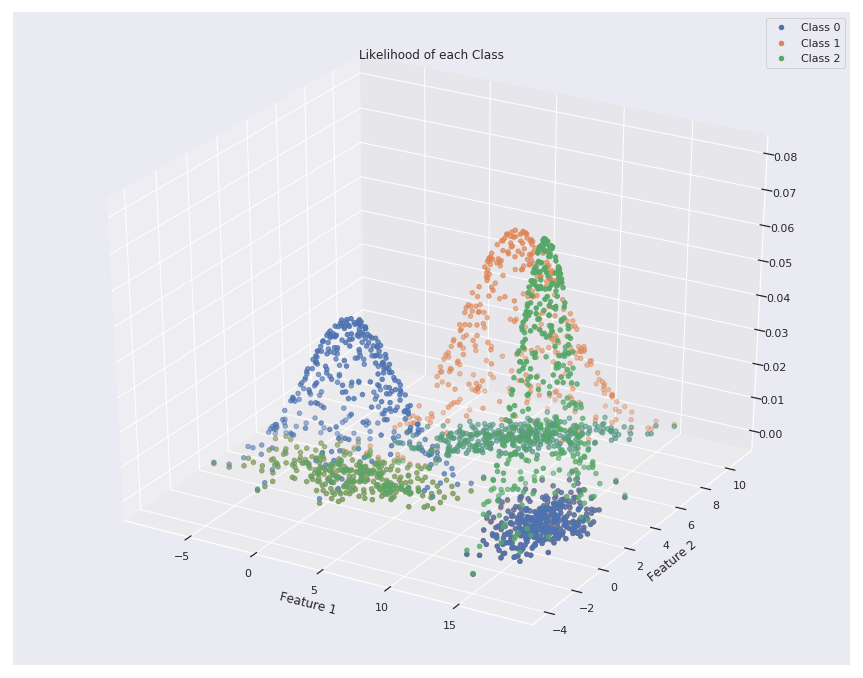

In [137]:
order = np.argsort(dataset.values[:,0])
X1_features = np.array(dataset.values[:,0])[order]
X2_features = np.array(dataset.values[:,1])[order]
likelihood_class_0 = np.array(prob_x_class_0)[order]
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1_features,X2_features,likelihood_class_0) # likelihood of 1st class

likelihood_class_1 = np.array(prob_x_class_1)[order]
ax.scatter(X1_features,X2_features,likelihood_class_1) # likelihood of 2nd class

likelihood_class_2 = np.array(prob_x_class_2)[order]
ax.scatter(X1_features,X2_features,likelihood_class_2) # likelihood of 3rd class
ax.legend(['Class 0', 'Class 1', 'Class 2'])
plt.title('Likelihood of each Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [142]:
def Posterior2D(Prior_prob):
    #Prior_prob = [1/3, 1/3, 1/3]
    P_x = prob_x_class_0*Prior_prob[0] + prob_x_class_1*Prior_prob[
    
    Posterior_0 = prob_x_class_0*Prior_prob[0]/P_x
    Posterior_1 = prob_x_class_1*Prior_prob[1]/P_x
    Posterior_2 = prob_x_class_2*Prior_prob[2]/P_x
    
    Posterior_class_0 = np.array(Posterior_0)[order]
    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(311, projection='3d')
    ax.scatter(X1_features,X2_features,Posterior_class_0) # posterior of Class 0

    Posterior_class_1 = np.array(Posterior_1)[order]
    ax = fig.add_subplot(312, projection='3d')
    ax.scatter(X1_features,X2_features,Posterior_class_1) # posterior of Class 1

    Posterior_class_2 = np.array(Posterior_2)[order]
    ax = fig.add_subplot(313, projection='3d')
    ax.scatter(X1_features,X2_features,Posterior_class_2) # posterior of class 2
    ax.legend(['Class 0', 'Class 1', 'Class 2'])
    plt.title('Posterior of each Class')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

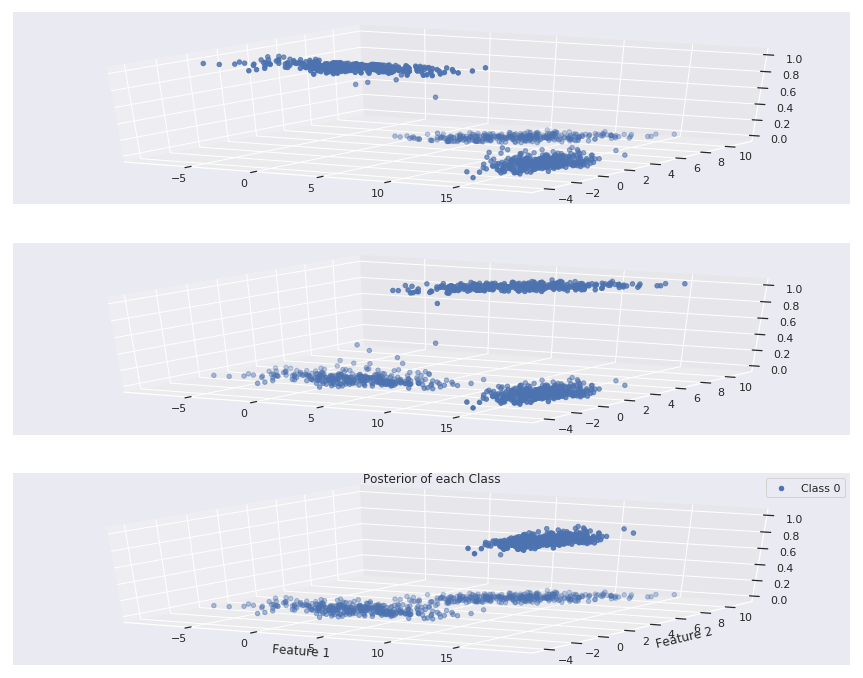

In [143]:
Prior_prob = [1/3,1/3,1/3]
Posterior2D(Prior_prob)

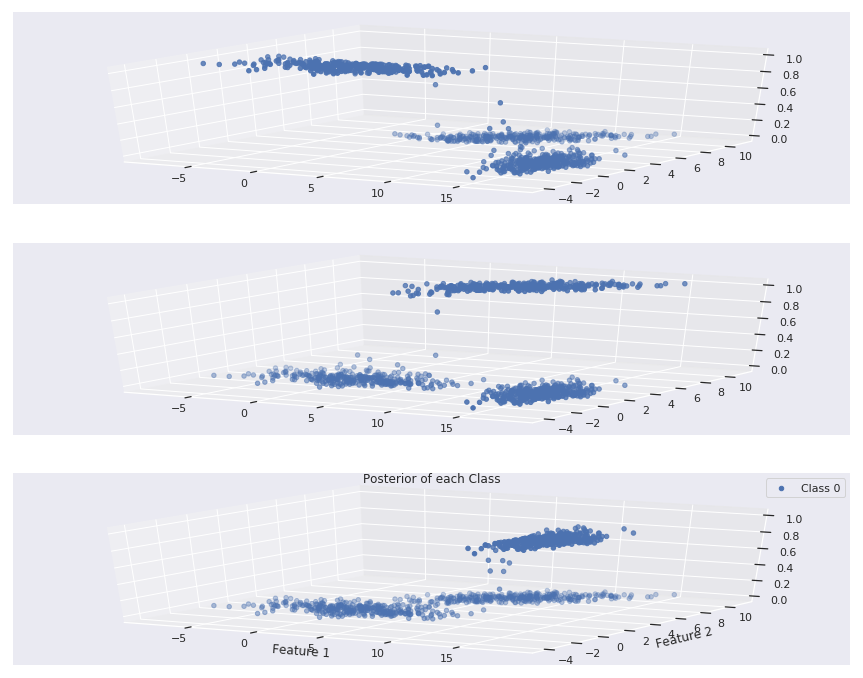

In [144]:
Prior_prob = [0.6,0.3,0.1]
Posterior2D(Prior_prob)

3. Classify the 10 samples from Table 1 using Bayesian Classifier. Assume that the under-lying distributions are normal. <br>
(a) Assume that the prior probabilities for the first two categories are equal (P(1) =
P(2) = 1/2 and P(3) = 0) and design a dichotomizer for those two categories using
only the x1 feature value.<br>
(b) Repeat all of the above, but now use two feature values, x1, and x2.<br>
(c) Repeat all of the above, but now use all the three feature values.
<br>
(d) Discuss your results. Determine the empirical training error on your samples, i.e.,
the percentage of points misclassified.

In [6]:
df = pd.read_csv("dataset.csv")
df.head()

,X1,X2,X3,Y
0,-5.01,-8.12,-3.68,1
1,-5.43,-3.48,-3.54,1
2,1.08,-5.52,1.66,1
3,0.86,-3.78,-4.11,1
4,-2.67,0.63,7.39,1


In [7]:
df1 = df.iloc[0:10,:]
df2 = df.iloc[10:20,:]
df3 = df.iloc[20:30,:]

In [8]:
Prior_prob = [0.5, 0.5, 0]

In [10]:
mean1 = df1.mean()
mean2 = df2.mean()
mean3 = df3.mean()
sigma1 = df1.std()
sigma2 = df2.std()
sigma3 = df3.std()

In [18]:
#likelihood is calculated by putting the value of x in gaussian funcn
P_x1_class_1 = norm(mean1[0],sigma1[0]).pdf(df.values[:,0])
P_x1_class_2 = norm(mean2[0],sigma2[0]).pdf(df.values[:,0])
P_x1_class_3 = norm(mean3[0],sigma3[0]).pdf(df.values[:,0])

P_x = P_x1_class_1*Prior_prob[0] + P_x1_class_2*Prior_prob[1] + P_x1_class_3*Prior_prob[2]

In [19]:
P_class1_x1 = P_x1_class_1*Prior_prob[0]/P_x
P_class2_x1 = P_x1_class_2*Prior_prob[1]/P_x
P_class3_x1 = P_x1_class_3*Prior_prob[2]/P_x

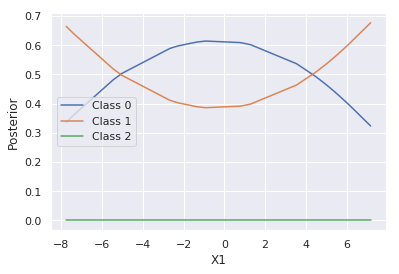

In [21]:
order = np.argsort(df.values[:,0])
xs1 = np.array(df.values[:,0])[order]
ys1 = np.array(P_class1_x1)[order]
plt.plot(xs1,ys1) # posterior of 1st class
plt.xlabel('X1')
plt.ylabel('Posterior')
order = np.argsort(df.values[:,0])
xs2 = np.array(df.values[:,0])[order]
ys2 = np.array(P_class2_x1)[order]
plt.plot(xs2,ys2) # posterior of 2nd class
ys3 = np.array(P_class3_x1)[order]
plt.plot(xs2,ys3)
plt.legend(['Class 0', 'Class 1','Class 2'])

In [45]:
g_x = P_class1_x1 - P_class2_x1
H_x = [1 if  elem >= 0 else 2 for elem in g_x]       

In [49]:
error = np.mean(H_x!=df.values[:,3])
error

0.5333333333333333

#### Error obtained = 53.33%



### Now using 2 features $X_1$ and $X_2$

In [80]:
cov1 = np.cov(df1.values[:,:2].T)
cov2 = np.cov(df2.values[:,:2].T)
cov3 = np.cov(df3.values[:,:2].T)

In [86]:
P_x1_class_1 = multivariate_normal.pdf(df.values[:,:2],mean = mean1[:2], cov = cov1)
P_x1_class_2 = multivariate_normal.pdf(df.values[:,:2],mean = mean2[:2], cov = cov2)
P_x1_class_3 = multivariate_normal.pdf(df.values[:,:2],mean = mean3[:2], cov = cov3)
P_x = P_x1_class_1*Prior_prob[0] + P_x1_class_2*Prior_prob[1] + P_x1_class_3*Prior_prob[2]

In [87]:
P_class1_x1 = P_x1_class_1*Prior_prob[0]/P_x
P_class2_x1 = P_x1_class_2*Prior_prob[1]/P_x
P_class3_x1 = P_x1_class_3*Prior_prob[2]/P_x

In [91]:
g_x = P_class1_x1 - P_class2_x1
H_x = [1 if  elem >= 0 else 2 for elem in g_x]
error = np.mean(H_x!=df.values[:,3])
error

0.6333333333333333

#### Error obtained = 63.33%

### Now using 3 features $X_1$, $X_2$ and $X_3$

In [104]:
cov1 = np.cov(df1.values[:,:3].T)
cov2 = np.cov(df2.values[:,:3].T)
cov3 = np.cov(df3.values[:,:3].T)

In [105]:
P_x1_class_1 = multivariate_normal.pdf(df.values[:,:3],mean = mean1[:3], cov = cov1)
P_x1_class_2 = multivariate_normal.pdf(df.values[:,:3],mean = mean2[:3], cov = cov2)
P_x1_class_3 = multivariate_normal.pdf(df.values[:,:3],mean = mean3[:3], cov = cov3)
P_x = P_x1_class_1*Prior_prob[0] + P_x1_class_2*Prior_prob[1] + P_x1_class_3*Prior_prob[2]

In [106]:
P_class1_x1 = P_x1_class_1*Prior_prob[0]/P_x
P_class2_x1 = P_x1_class_2*Prior_prob[1]/P_x
P_class3_x1 = P_x1_class_3*Prior_prob[2]/P_x

In [107]:
g_x = P_class1_x1 - P_class2_x1
H_x = [1 if  elem >= 0 else 2 for elem in g_x]
error = np.mean(H_x!=df.values[:,3])
error

0.43333333333333335

#### Error = 43.33%